## Observations and Insights 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice.
combined_data["Mouse ID"].value_counts()


g989    13
l471    10
u327    10
s565    10
j984    10
        ..
o848     1
u153     1
l872     1
x336     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mouse_id

array(['g989'], dtype=object)

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 



In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = combined_data[combined_data['Mouse ID'].isin(dup_mouse_id)==False]

In [26]:
# Checking the number of mice in the clean DataFrame.
combined_data["Mouse ID"].value_counts()

l471    10
m269    10
j296    10
o287    10
k483    10
        ..
h428     1
o848     1
v199     1
t573     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_reg_group = combined_data.groupby(["Drug Regimen"])
drug_reg_group

#Calculate the mean, median, variance, standard deviation and SEM
drug_reg_mean = drug_reg_group["Tumor Volume (mm3)"].mean()

drug_reg_median = drug_reg_group["Tumor Volume (mm3)"].median()

drug_reg_var = drug_reg_group["Tumor Volume (mm3)"].var()

drug_reg_std = drug_reg_group["Tumor Volume (mm3)"].std()

drug_reg_sem = drug_reg_group["Tumor Volume (mm3)"].sem()

drug_reg_summary = pd.DataFrame({"Mean": drug_reg_mean, "Median": drug_reg_median, 
                                 "Variance": drug_reg_var, "Standard Deviation": drug_reg_std,
                                 "SEM": drug_reg_sem})
drug_reg_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function



## Bar and Pie Charts

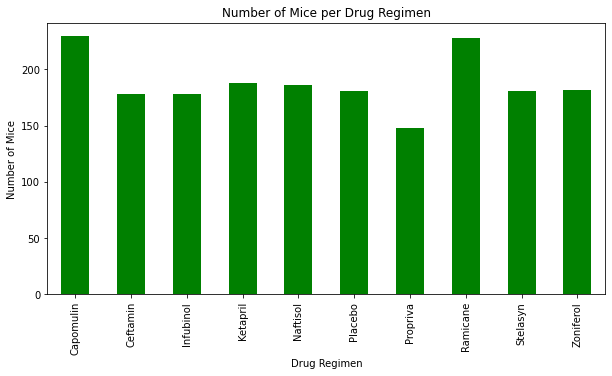

<Figure size 432x288 with 0 Axes>

In [28]:
#Create a data frame with the count of mice in each drug regimine
reg_mice_count = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
reg_mice_count

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
reg_mice_count.plot(kind="bar", figsize=(10,5), color="green")

#set chart title
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

#show chart and set layout
plt.show()
plt.tight_layout()




Text(0, 0.5, 'Number of Mice')

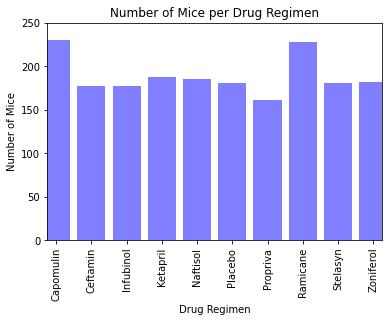

In [31]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Create an array that contains the number of mice for each drug regimen and set the x_axis to the lenth
num_mice = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(num_mice))

# Tell matplotlib that we will be making a bar chart
plt.bar(x_axis, num_mice, color='b', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin","Infubinol", "Ketapril", "Naftisol",
                            "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

# Sets the x limits
plt.xlim(-0.25, len(x_axis)-0.75)

# Sets the y limits
plt.ylim(0, max(num_mice)+20)

# Give our chart some labels and a tile
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")




In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
